In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [46]:
dfm = pd.read_csv("/Users/uditnegi36/Downloads/movies.csv")
dfm.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [24]:
dfm.shape

(7668, 15)

In [25]:
dfm.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [26]:
# one more way to find null value
for col in dfm.columns:
    val_miss = np.sum(dfm[col].isnull())
    print('{}-{}'.format(col,val_miss))

name-0
rating-77
genre-0
year-0
released-2
score-3
votes-3
director-0
writer-3
star-1
country-3
budget-2171
gross-189
company-17
runtime-4


In [27]:
dfm = dfm.dropna(axis=0 , subset=['budget','gross','votes'])
dfm.shape

(5436, 15)

In [28]:
dfm.drop_duplicates()
dfm.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [29]:
dfm['budget']=dfm['budget'].astype('int64')
dfm['gross']=dfm['gross'].astype('int64')

In [30]:
dfm.sort_values(by=['gross'],inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


<AxesSubplot:>

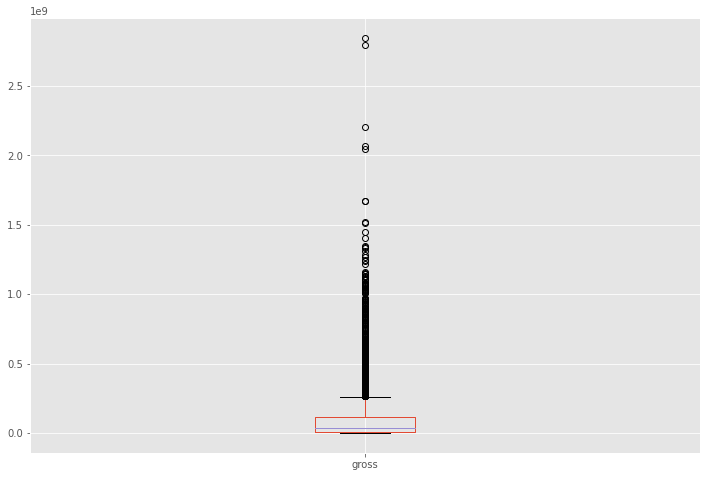

In [41]:
dfm.boxplot(column=['gross'])

#prediction
1. budget will have high co relation
2. company wil have high relation 
wrt to gross earning of the movie 

Text(0.5, 1.0, 'budget vs gross')

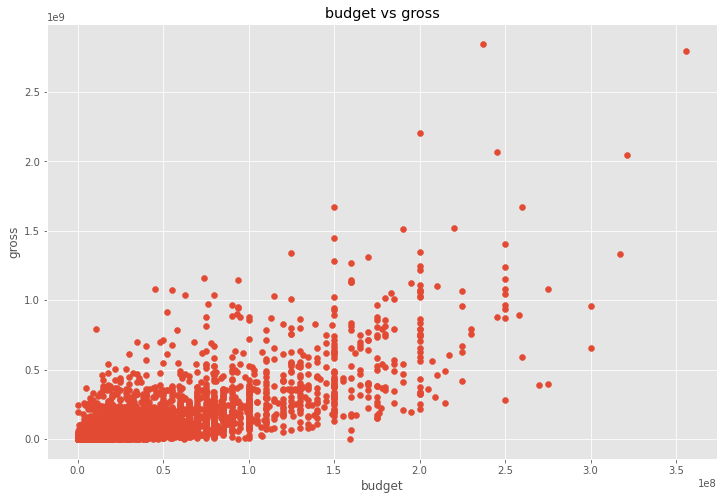

In [31]:
plt.scatter(x=dfm['budget'],y=dfm['gross'])
plt.xlabel('budget')
plt.ylabel('gross')
plt.title('budget vs gross')

<AxesSubplot:xlabel='budget', ylabel='gross'>

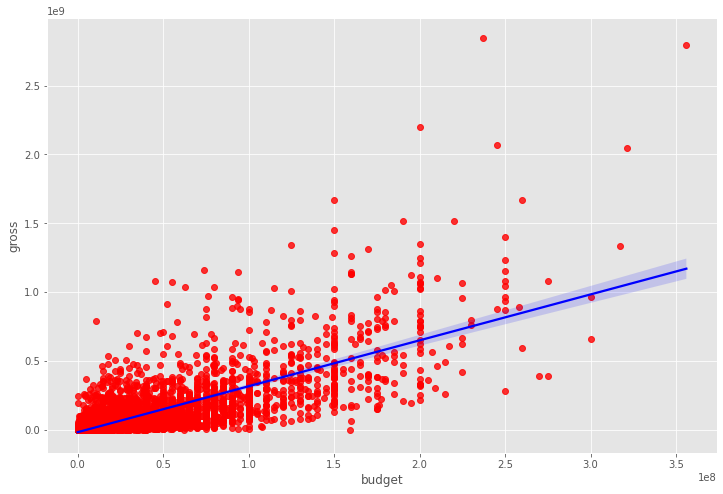

In [32]:
sns.regplot(x='budget',y='gross',data = dfm, scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [33]:
dfm.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


<AxesSubplot:>

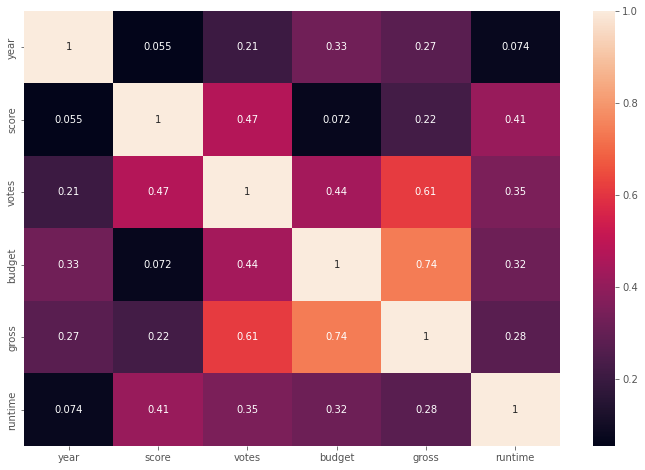

In [34]:
correlation_matrix= dfm.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)

In [38]:
df_numarized = dfm
for coln in df_numarized.columns:
    if (df_numarized[coln].dtype =='object'):
        df_numarized[coln] = df_numarized[coln].astype('category')
        df_numarized[coln] = df_numarized[coln].cat.codes

df_numarized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,46,19000000,46998772,1432,146.0
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,47,4500000,58853106,454,104.0
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,47,18000000,538375067,949,124.0
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,47,3500000,83453539,1114,88.0
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,47,6000000,39846344,1089,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,6,0,2020,907,6.6,140000.0,17,2397,1819,47,90000000,426505244,454,124.0
7649,3569,4,0,2020,715,6.5,102000.0,854,2316,148,47,85000000,319715683,1114,99.0
7650,1156,4,1,2020,907,5.6,53000.0,1814,2836,1474,47,175000000,245487753,1403,101.0
7651,3992,4,1,2020,760,6.8,42000.0,296,2096,641,6,135000000,111105497,12,100.0


Text(0.5, 1.0, 'Co relation matrix for movies')

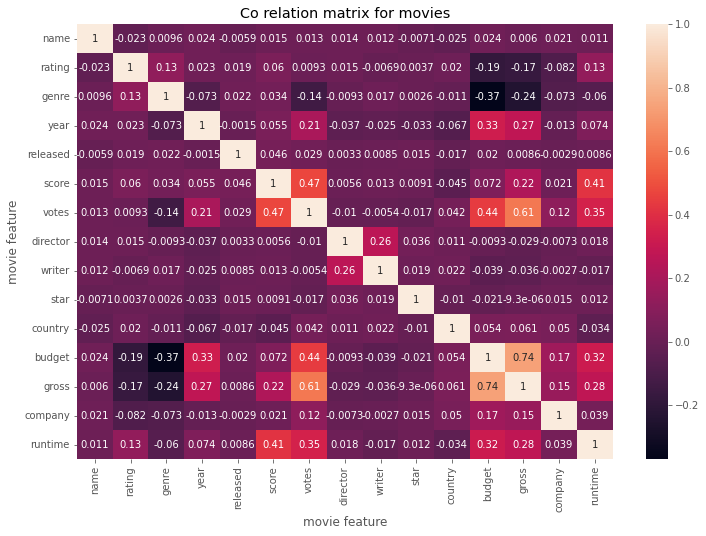

In [43]:
df_numarized_corr = df_numarized.corr()
sns.heatmap(df_numarized_corr,annot=True)
plt.xlabel('movie feature')
plt.ylabel('movie feature')
plt.title('Co relation matrix for movies')


In [45]:
dfm

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,46,19000000,46998772,1432,146.0
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,47,4500000,58853106,454,104.0
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,47,18000000,538375067,949,124.0
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,47,3500000,83453539,1114,88.0
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,47,6000000,39846344,1089,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,6,0,2020,907,6.6,140000.0,17,2397,1819,47,90000000,426505244,454,124.0
7649,3569,4,0,2020,715,6.5,102000.0,854,2316,148,47,85000000,319715683,1114,99.0
7650,1156,4,1,2020,907,5.6,53000.0,1814,2836,1474,47,175000000,245487753,1403,101.0
7651,3992,4,1,2020,760,6.8,42000.0,296,2096,641,6,135000000,111105497,12,100.0


<AxesSubplot:xlabel='rating', ylabel='gross'>

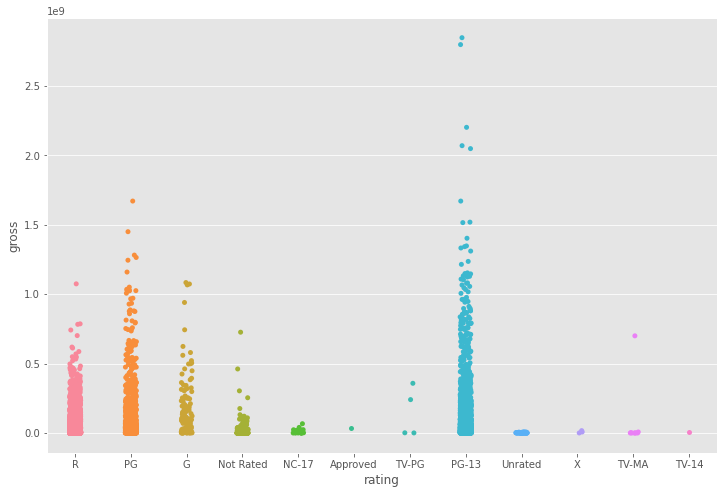

In [49]:
sns.stripplot(x='rating',y='gross',data=dfm)